<a href="https://colab.research.google.com/github/Zenidog8/CCSS-Recursos-Humanos-Data-Set/blob/master/CCSS_RH_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final

Curso: Machine Learning

Estudiantes:
* José Araya
* José Godínez

## Descripción del problema

La gestión eficiente y transparente del recurso humano en instituciones públicas es un componente clave para el fortalecimiento del estado social de derecho. En particular, la Caja Costarricense de Seguro Social (CCSS) representa uno de los pilares fundamentales del sistema de salud costarricense, y su correcto funcionamiento depende en gran medida de la adecuada distribución, evaluación y compensación del personal que la conforma.

En años recientes, la CCSS ha enfrentado una crisis significativa en relación con la retención de médicos especialistas y otros profesionales de alta calificación, lo cual ha generado preocupación en diversos sectores de la sociedad. Este fenómeno ha motivado discusiones sobre las condiciones laborales, los esquemas salariales y la equidad en los procesos de evaluación y promoción del personal.

En este contexto, resulta pertinente analizar la correspondencia entre el salario recibido, el cargo ocupado y la unidad organizacional del funcionario, en relación con las evaluaciones de desempeño que éste ha recibido. Esta relación, si bien fundamental para garantizar principios de mérito y eficiencia, no ha sido ampliamente estudiada mediante enfoques automatizados y cuantitativos.

Este trabajo propone el uso de algoritmos de aprendizaje automático para modelar y predecir el desempeño laboral del personal a partir de variables observables como el salario, puesto y unidad organizativa. A través de esta aproximación, se pretende:

- Identificar posibles desalineamientos entre desempeño y remuneración.
- Detectar patrones estructurales que puedan afectar la equidad o eficiencia interna.
- Ofrecer evidencia cuantitativa que respalde el diseño de políticas de recursos humanos más justas y basadas en datos.

La pertinencia social y académica de este estudio se sustenta, además, en su potencial para contribuir a debates informados sobre la gestión pública del talento humano, en un momento en que el país atraviesa desafíos críticos en la sostenibilidad y capacidad operativa de su sistema de salud.

## Descripción del data set

El conjunto de datos utilizado en este estudio fue obtenido del portal oficial de datos abiertos de la Caja Costarricense de Seguro Social (CCSS), disponible en https://www.ccss.sa.cr/datos-abiertos. Este portal proporciona acceso a diversos conjuntos de datos relacionados con la gestión institucional, incluyendo información sobre recursos humanos, evaluaciones de desempeño y planillas salariales.

Para los fines de esta investigación, se integraron tres conjuntos de datos independientes disponibles en el portal:

1. Evaluación del desempeño: Contiene registros de las calificaciones obtenidas por el personal en sus evaluaciones periódicas.
1. Planilla con salario bruto: Incluye información sobre los salarios brutos mensuales de los funcionarios.
1. Jefaturas: Proporciona detalles sobre los cargos y unidades organizativas dentro de la institución.

Estos conjuntos de datos fueron descargados en sus formatos originales y, posteriormente, se realizó un proceso de integración y limpieza para consolidarlos en un único dataset. El dataset resultante consta de 66,508 registros y 11 columnas, abarcando información relevante como identificadores de los funcionarios, calificaciones de desempeño, cargos, unidades de procedencia, fechas de actualización y montos salariales.

## Obtención de los datos


In [1]:
# carga remota
import os
import requests

def obtener_archivo_remoto(url, nombre_archivo):
  if not os.path.exists(nombre_archivo):
    response = requests.get(url)
    with open(nombre_archivo, "wb") as f:
      f.write(response.content)
      print(f"Archivo '{nombre_archivo}' descargado correctamente.")
  else:
    print(f"Archivo '{nombre_archivo}' ya existe.")

In [2]:
# obtener datasets
url = "https://github.com/Zenidog8/CCSS-Recursos-Humanos-Data-Set/raw/refs/heads/master/raw-data/evaluaciones_export_12042025.csv"
obtener_archivo_remoto(url, "evaluaciones.csv")

url = "https://github.com/Zenidog8/CCSS-Recursos-Humanos-Data-Set/raw/refs/heads/master/raw-data/jefaturas_export_12042025.csv"
obtener_archivo_remoto(url, "jefaturas.csv")

url = "https://github.com/Zenidog8/CCSS-Recursos-Humanos-Data-Set/raw/refs/heads/master/raw-data/salarios_export_12042025.csv"
obtener_archivo_remoto(url, "salarios.csv")

Archivo 'evaluaciones.csv' ya existe.
Archivo 'jefaturas.csv' ya existe.
Archivo 'salarios.csv' ya existe.


## Exploración inicial de los datos

In [3]:
import pandas as pd

evaluaciones = pd.read_csv("/content/evaluaciones.csv", encoding='latin-1', delimiter=';')
jefaturas = pd.read_csv("/content/jefaturas.csv", encoding='latin-1', delimiter=';')
salarios = pd.read_csv("/content/salarios.csv", encoding='latin-1', delimiter=';')

In [4]:
evaluaciones.head()

,Cedula,Funcionario,Calificacion,Perfil,Fecha de Actualizacion
0,503710425,RODRIGUEZ GUTIERREZ MARIA FERNAN,97,NaN,2024-09-30 00:00:00
1,112380487,ANDRADE CHAVARRIA CYNTHIA REBECA,100,NaN,2024-09-30 00:00:00
2,205420985,RAMOS MUÑOZ FREDY MAURICIO,98,NaN,2024-09-30 00:00:00
3,113760476,VARELA RAMOS FLOR,96,NaN,2024-09-30 00:00:00
4,603500676,RUEDA ABADIA LEONELA,99,NaN,2024-09-30 00:00:00


In [5]:
evaluaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55197 entries, 0 to 55196
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cedula                  55197 non-null  object 
 1   Funcionario             55197 non-null  object 
 2   Calificacion            55197 non-null  int64  
 3   Perfil                  0 non-null      float64
 4   Fecha de Actualizacion  55197 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
jefaturas.head()

,Cedula,Nombre,Unidad de procedencia (UP),Detalle de UP,Puesto,Fecha de actualizaciÃ³n
0,110390475,CAROLINA ARGUEDAS VARGAS,1101,Junta Directiva,Jefe Ãrea de Sede,2025-04-10 00:00:00
1,113750446,MARIA BEATRIZ GUZMAN MEZA,1101,Junta Directiva,Profesional 4 (G. de E.),2025-04-10 00:00:00
2,303520549,JENNY MADRIGAL QUIROS,1102,Presidencia Ejecutiva,Asesor de Presidencia Ejecutiva,2025-04-10 00:00:00
3,113570358,JOSE LUIS ROJAS HENRIQUEZ,1102,Presidencia Ejecutiva,Jefe SubÃ¡rea de Sede,2025-04-10 00:00:00
4,107900094,GUSTAVO PICADO CHACON,1103,Gerencia Financiera,Gerente Financiero,2025-04-10 00:00:00


In [7]:
jefaturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Cedula                      1924 non-null   int64 
 1   Nombre                      1924 non-null   object
 2   Unidad de procedencia (UP)  1924 non-null   int64 
 3   Detalle de UP               1924 non-null   object
 4   Puesto                      1924 non-null   object
 5   Fecha de actualizaciÃ³n     1924 non-null   object
dtypes: int64(2), object(4)
memory usage: 90.3+ KB


In [8]:
salarios.head()

,ID,Nombre,Salario,Puesto,Fecha de actualizacion
0,702630005,WENDOLY PRISCILLA ABARCA MOJICA,C=0.00,TRAB.SERV.GENERALES,2025-04-10 00:00:00
1,107620178,JUAN ANTONIO ABARCA MORA,C=0.00,TRAB. DE PRODUCC.2,2025-04-10 00:00:00
2,115710811,ALFONSINA ALEXANDRA ABARCA ...,C=0.00,AUXILIAR DE NUTRIC,2025-04-10 00:00:00
3,108020808,SIDEY OVERLIOT ABARCA ...,C=0.00,AUX. DE ENFERMERIA,2025-04-10 00:00:00
4,304820817,VIVIAN YINNETTE ABARCA ZUÑIGA,C=0.00,MEDICO RESIDENTE,2025-04-10 00:00:00


In [9]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65383 entries, 0 to 65382
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      65383 non-null  int64 
 1   Nombre                  65383 non-null  object
 2   Salario                 65383 non-null  object
 3   Puesto                  65383 non-null  object
 4   Fecha de actualizacion  65383 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.5+ MB


## Preprocesamiento del Dataset

### Consolidación de los data sets

In [10]:
jefaturas['Cedula'] = jefaturas['Cedula'].astype(str)
salarios['ID'] = salarios['ID'].astype(str)

salarios = salarios.rename(columns={'ID': 'Cedula'})

In [11]:
evaluaciones.drop('Funcionario', axis=1, inplace=True)
salarios.drop('Nombre', axis=1, inplace=True)
jefaturas.drop('Puesto', axis=1, inplace=True)

In [12]:
ccss_recursos_humanos = pd.merge(evaluaciones, jefaturas, on='Cedula', how='outer')
ccss_recursos_humanos = pd.merge(ccss_recursos_humanos, salarios, on='Cedula', how='outer')

ccss_recursos_humanos.head()

,Cedula,Calificacion,Perfil,Fecha de Actualizacion,Nombre,Unidad de procedencia (UP),Detalle de UP,Fecha de actualizaciÃ³n,Salario,Puesto,Fecha de actualizacion
0,"1,22201E+11",100.0,NaN,2024-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,55806E+11",100.0,NaN,2024-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,55815E+11",97.0,NaN,2024-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1012340794,99.0,NaN,2024-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104041007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"C=5,103,745.20",MEDICO EVALUADOR 2,2025-04-10 00:00:00


In [13]:
ccss_recursos_humanos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66508 entries, 0 to 66507
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cedula                      66508 non-null  object 
 1   Calificacion                55197 non-null  float64
 2   Perfil                      0 non-null      float64
 3   Fecha de Actualizacion      55197 non-null  object 
 4   Nombre                      1924 non-null   object 
 5   Unidad de procedencia (UP)  1924 non-null   float64
 6   Detalle de UP               1924 non-null   object 
 7   Fecha de actualizaciÃ³n     1924 non-null   object 
 8   Salario                     65386 non-null  object 
 9   Puesto                      65386 non-null  object 
 10  Fecha de actualizacion      65386 non-null  object 
dtypes: float64(3), object(8)
memory usage: 5.6+ MB


### Limpieza de datos

In [14]:
# Conteo de nulos
print(ccss_recursos_humanos.isnull().sum())

Cedula                            0
Calificacion                  11311
Perfil                        66508
Fecha de Actualizacion        11311
Nombre                        64584
Unidad de procedencia (UP)    64584
Detalle de UP                 64584
Fecha de actualizaciÃ³n       64584
Salario                        1122
Puesto                         1122
Fecha de actualizacion         1122
dtype: int64


In [15]:
# Renombrar columnas: se eliminan espacios en blanco, se ponen en minúsculas y se reemplazan espacios por guiones bajos
ccss_recursos_humanos.columns = ccss_recursos_humanos.columns.str.strip().str.lower().str.replace(' ', '_').str[:20]
print("Nuevos nombres de columnas:")
print(ccss_recursos_humanos.columns.tolist())

Nuevos nombres de columnas:
['cedula', 'calificacion', 'perfil', 'fecha_de_actualizaci', 'nombre', 'unidad_de_procedenci', 'detalle_de_up', 'fecha_de_actualizaci', 'salario', 'puesto', 'fecha_de_actualizaci']


In [16]:
# se eliminan las filas donde falte el salario y la evalucion de desempeño
ccss_recursos_humanos = ccss_recursos_humanos.dropna(subset=['salario', 'calificacion'])

In [17]:
# limpieza de la columna 'salario'
if 'salario' in ccss_recursos_humanos.columns:
    # eliminar signos de dólar, comas y otros caracteres especiales
    ccss_recursos_humanos['salario'] = ccss_recursos_humanos['salario'].replace({'C=': '', ',': ''}, regex=True)
    ccss_recursos_humanos['salario'] = pd.to_numeric(ccss_recursos_humanos['salario'], errors='coerce')

In [18]:
if 'calificacion' in ccss_recursos_humanos.columns:
    ccss_recursos_humanos['calificacion'] = pd.to_numeric(ccss_recursos_humanos['calificacion'], errors='coerce')

In [19]:
# eliminacion de duplicador si existen
num_duplicados = ccss_recursos_humanos.duplicated().sum()
print(f"Número de registros duplicados antes de la eliminación: {num_duplicados}")

if num_duplicados > 0:
    ccss_recursos_humanos = ccss_recursos_humanos.drop_duplicates()
    print(f"Registros duplicados eliminados. Número de registros únicos: {len(ccss_recursos_humanos)}")

Número de registros duplicados antes de la eliminación: 0


In [20]:
# se eliminan columnas nulas o con información sensible
ccss_recursos_humanos = ccss_recursos_humanos.drop('nombre', axis=1)
ccss_recursos_humanos = ccss_recursos_humanos.drop('perfil', axis=1)
ccss_recursos_humanos = ccss_recursos_humanos.drop('fecha_de_actualizaci', axis=1)

In [21]:
# se eliminan filas donde el salario es 0
total_filas = len(ccss_recursos_humanos[ccss_recursos_humanos['salario'] == 0])
print(f"Número de filas con salario igual a 0: {total_filas}")

if total_filas > 0:
    ccss_recursos_humanos = ccss_recursos_humanos[ccss_recursos_humanos['salario'] != 0]

Número de filas con salario igual a 0: 959


In [22]:
print("Dimensiones finales del dataset:", ccss_recursos_humanos.shape)
ccss_recursos_humanos.info()

Dimensiones finales del dataset: (53116, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 53116 entries, 5 to 66506
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cedula                53116 non-null  object 
 1   calificacion          53116 non-null  float64
 2   unidad_de_procedenci  1838 non-null   float64
 3   detalle_de_up         1838 non-null   object 
 4   salario               53116 non-null  float64
 5   puesto                53116 non-null  object 
dtypes: float64(3), object(3)
memory usage: 2.8+ MB


In [23]:
ccss_recursos_humanos.head()

,cedula,calificacion,unidad_de_procedenci,detalle_de_up,salario,puesto
5,104050851,92.0,1112.0,DirecciÃ³n TÃ©cnica Actuarial y EconÃ³mica,2582297.30,JEFE AREA DE SEDE
6,104100417,99.0,2103.0,Hospital Nacional de NiÃ±os Carlos Saenz Herrera,4967255.17,MEDICO JEFE 3
7,104101222,100.0,NaN,NaN,4504677.40,ODONT. ESPECIALISTA
8,104160498,100.0,NaN,NaN,733192.00,MENSAJERO
9,104400115,100.0,NaN,NaN,343662.50,CAPELLAN


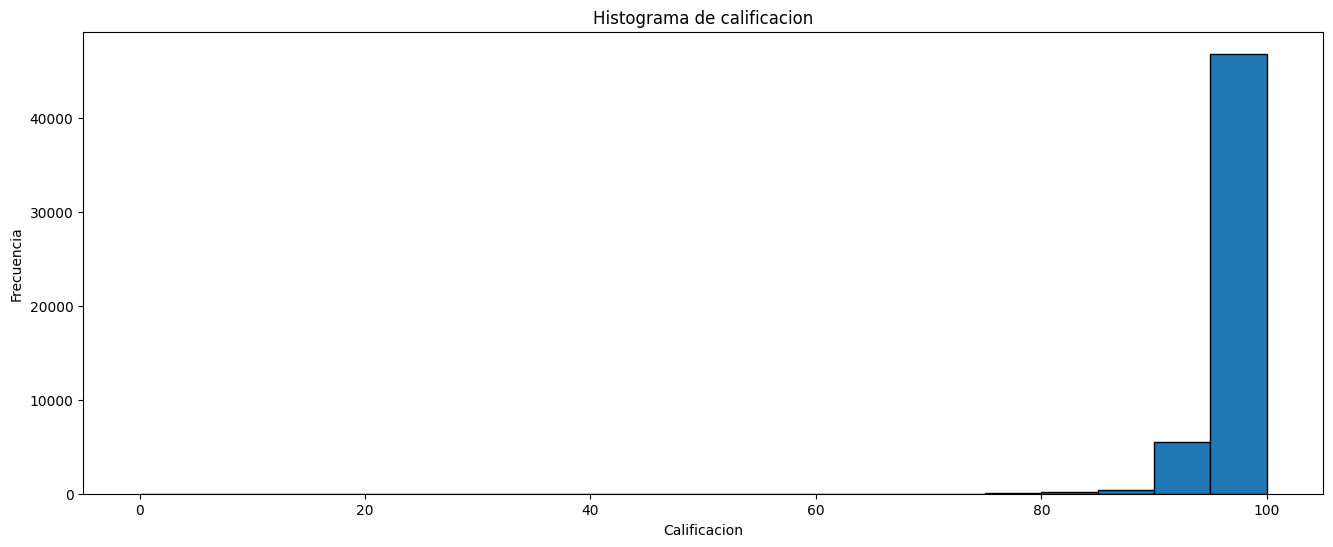

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
plt.hist(ccss_recursos_humanos['calificacion'], bins=20, edgecolor='black')
plt.xlabel('Calificacion')
plt.ylabel('Frecuencia')
plt.title('Histograma de calificacion')
plt.show()

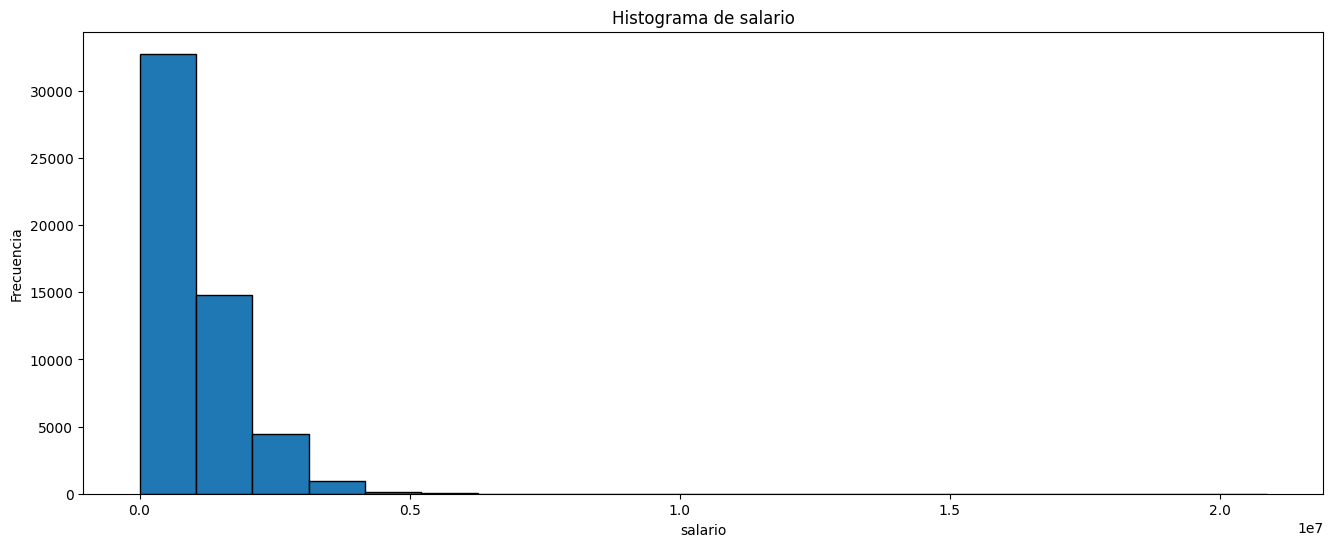

In [25]:
plt.figure(figsize=(16, 6))
plt.hist(ccss_recursos_humanos['salario'], bins=20, edgecolor='black')
plt.xlabel('salario')
plt.ylabel('Frecuencia')
plt.title('Histograma de salario')
plt.show()

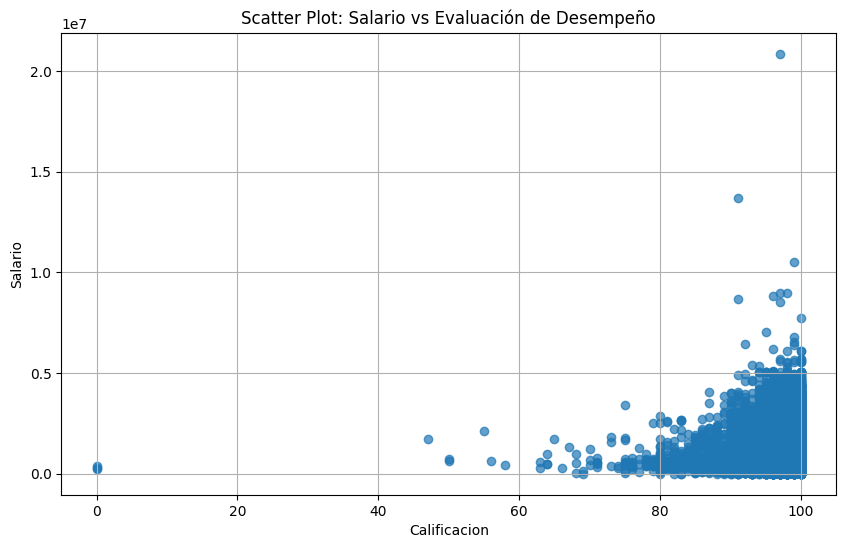

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(ccss_recursos_humanos['calificacion'], ccss_recursos_humanos['salario'], alpha=0.7)
plt.title('Scatter Plot: Salario vs Evaluación de Desempeño')
plt.xlabel('Calificacion')
plt.ylabel('Salario')
plt.grid(True)
plt.show()

In [27]:
ccss_recursos_humanos.to_csv('ccss_recursos_humanos.csv', index=False)